# 다층퍼셉트론 XOR 실습

#### 퍼셉트론의 한계

AND, NAND, OR 게이트 구현은 하나의 퍼셉트론으로 쉽게 구현할 수 있는 것을 앞에서 확인할 수 있었습니다. 이들 게이트들은 공통점은 아래 그래프와 같이 선형성을 띈다는 것입니다.

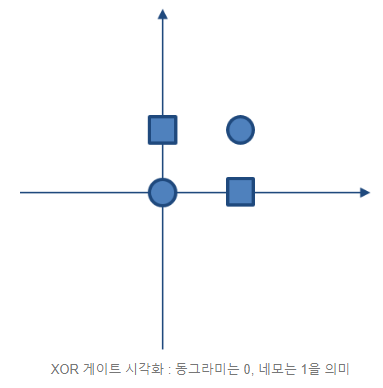

위의 AND 게이트 뿐만 아니라 NAND, OR 게이트는 직선으로 그어서 1과 0의 값을 나눌 수 있습니다. 하지만 XOR이라는 또 다른 게이트가 있습니다. 진리표와 그래프는 다음과 같고 그림을 보고 직선으로 0과 1의 값을 구분할 수 없음을 알 수 있습니다.

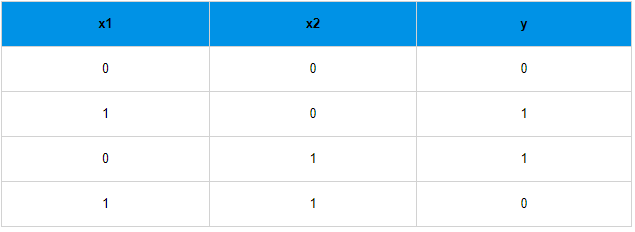

위의 그래프는 도저히 직선으로는 네모(1)와 동그라미(0)을 구분할 수 없음을 확인 할 수 있습니다.  그러면 어떤 방법이 있을까요?

#### 비선형성 : 다층 퍼셉트론으로

만약 직선의 제약을 없엔다면 아래와 같이 곡선으로 충분히 구분할 수 있습니다.

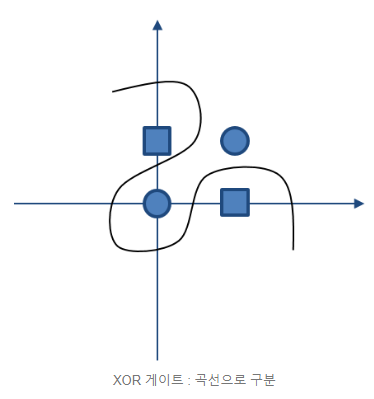

위의 구조을 확인하면 하나의 퍼셉트론이 아닌 두개 이상의 퍼셉트론이 필요한 것 임을 충분히 확인할 수 있습니다. 따라서 XOR의 퍼셉트론은 다음과 같이 여러개의 퍼셉트론을 이용하여 나타낼 수 있습니다. 

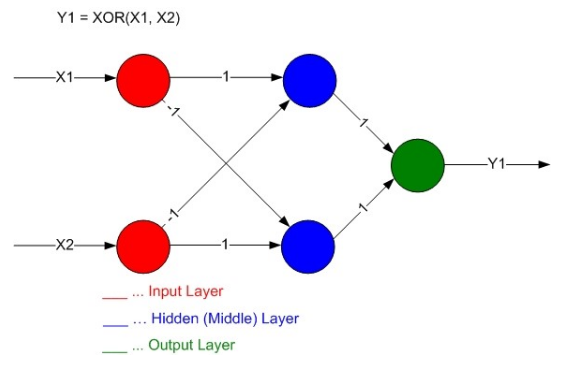

위 그림을 보시면 AND, OR, NAND와 달리 입력층에서 바로 출력층을 가는것이 아니라 Hidden Layer라는 은닉층이라고 부르는 층이  하나 더 생겼습니다. 은닉층은 여러 개의 층으로 늘릴 수 있으며 은닉층이 적어도 한 개 이상이면 다층 퍼셉트론이라고 불립니다.

In [3]:
#파이썬 코드 : AND 구현

import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    elif :
        return 1

In [4]:
#파이썬 코드: NAND 구현

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    elif :
        return 1

In [5]:
#파이썬 코드: OR 구현

def OR(x1, x2):
     x = np.array([x1, x2])
     w = np.array([0.5, 0.5])
     b = -0.2 
     tmp = np.sum(w*x) +b
     if tmp <= 0:
         return 0
     else:
         return 1

In [6]:
#파이썬 코드: XOR 구현

def XOR(x1, x2):
     s1 = NAND(x1, x2)
     s2 = OR(x1, x2)
     y = AND(s1, s2)
     return y

XOR 구현을 보면 NAND, OR 게이터의 출력을 다시 AND 게이트가 입력값으로 받아 다시 y로 출력하는 구조입니다. 이렇게 이중으로 선형구조를 가지고 있던 게이트를 중첩시키면 비선형 XOR 게이트도 쉽게 나타낼 수 있음을 확인할 수 있습니다.

In [7]:
XOR(0,0) #0을 출력

0

In [8]:
XOR(1,0) #1을 출력

1

In [9]:
XOR(0,1) #1을 출력

1

In [10]:
XOR(1,1) #0을 출력

0

이것을 노드를 이용한 퍼셉트론으로 표현하면 다음과 같다.

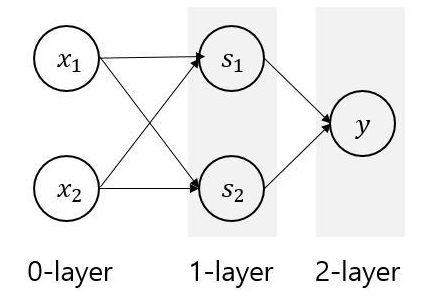

.

이번 실습에서는 직접 다층 퍼셉트론을 텐서플로로 구현하고, 단일 퍼셉트론으로 불가능했던 XOR 연산을 다층 퍼셉트론으로 구현해 보겠습니다. 

구현할 다층 퍼셉트론의 구조는 아래와 같습니다.

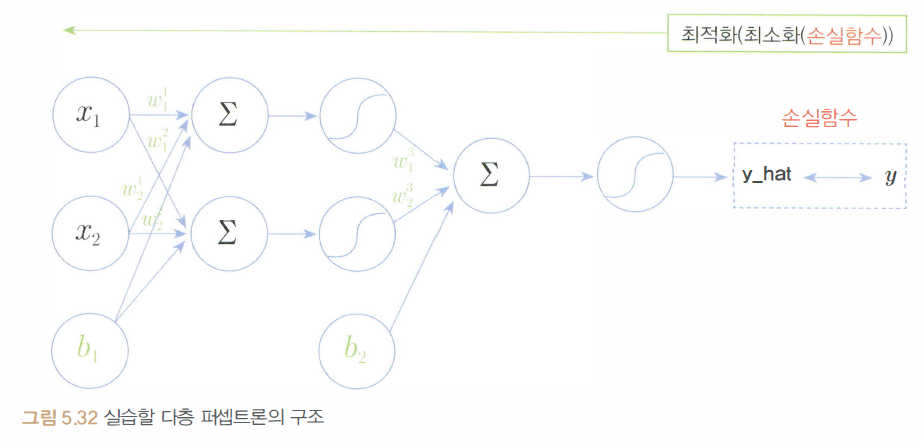

이론에서는 활성화함수로 스텝함수를 사용했지만 이번 실습에서는 활성화 함수로 시그모이드 함수를 사용합니다. 시그모이드 함수를 활성화 함수로 사용하는 주된 이유는 경사하강법을 통한 모델의 최적화가 가능하기 때문입니다.

# 라이브러리 임포트

In [1]:
# 파이썬 2와 3에 모두 호환되도록 필요한 모듈을 임포트합니다
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 항상 같은 결과를 갖기 위해 랜덤 시드 설정
tf.random.set_seed(678)

import numpy as np

In [2]:
print(tf.__version__)

2.0.0


# 텐서플로우 그래프 정의하기
가장 먼저 입력 레이어를 정의하겠습니다.  
XOR 연산 입력 데이터를 X, 결과값을 y라고 정의하겠습니다.  

XOR 연산을 위해 입력값 X는 아래와 같이 [4,2]의 형태를 갖습니다.
  
[0, 0],  
[0, 1],  
[1, 0],  
[1, 1]  

입력값에 따른 출력값 y는 [4,1]의 형태를 갖습니다.    
[0,1,1,0]  

In [3]:
X = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = np.array([0.,1.,1.,0.])

# 모델 생성

다층퍼셉트론은 아래와 같이 구현합니다. 

그림과 같이 두개의 입력값을 받는 첫번째 레이어,

첫 번째 레이어의 출력 값을 받아 결과값을 출력하는 두 번째 레이어를 확인할 수 있습니다.

In [4]:
model = Sequential()

# 첫번째 히든 레이어
model.add(Dense(units=2,activation='sigmoid',input_dim=2))

# 두번째 히든 레이어
model.add(Dense(units=1,activation='sigmoid'))

#### 주요 인자는 다음과 같습니다.

- 첫번째 인자 : 출력 뉴런의 수를 설정합니다.
- input_dim : 입력 뉴런의 수를 설정합니다.
- init : 가중치 초기화 방법 설정합니다.
    - uniform : 균일 분포
    - normal : 가우시안 분포
- activation : 활성화 함수 설정합니다.
    - linear : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    - relu : rectifier 함수, 은익층에 주로 쓰입니다.
    - sigmoid : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    - softmax : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

.

아래와 같이 손실 함수 및 최적화를 정의합니다.

손실 함수는 크로스 엔트로피, 최적화는 경사하강법(sgd)을 사용합니다.

In [5]:
# 손실 함수 및 최적화 정의
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [6]:
# 모델 요약
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


첫 번째 레이어(dense)는 두 개의 출력값(None, 2)을 갖고, 6개의 파라미터를 가지 고 있는 것을 확인할 수 있습니다. 

파라미터가 6개인 이유는, 2 개의 가중치를 가진 노드가 2개 있고, 노드마다 1개씩의 편향값을 가지기 때문입니다.

두 번째 레이어(dense_1)는 한 개의 출력 값을 갖고, 3개의 파라미터가 있습니다. 

파라미터가 3개인 이유는, 2 개의 가중치를 가진 노드가 1개 있고, 그노드를 위한 하나의 편향값이 존재하기 때문입니다.

.

# 모델 학습

In [7]:
# 모델 학습, 10분 정도 걸립니다. 모델 학습 진행 상황을 보시려면 
# verbose=1로 수정해주세요.

model.fit(X,y,epochs=50000,batch_size=4,verbose=0)

# 테스트
학습 결과를 통해, [0,0], [1,1]은 0에 가까운 값을 출력하고,  
[0,1], [1,0]은 1에 가까운 값을 출력하는 것을 확인할 수 있습니다.

In [17]:
print(model.predict(X,batch_size=4))

[[0.06190902]
 [0.94067526]
 [0.9409089 ]
 [0.07283714]]


# 첫번째 레이어 파라미터 확인
첫째 노드의 가중치는 3.5567362, 3.5493941, 편향값은 -5.40607입니다.  
둘째 노드의 가중치는 5.79164, 5.742752, 편향값은 -2.329901입니다.

In [18]:
print("first layer weights: ",model.layers[0].get_weights()[0])
print("first layer bias: ",model.layers[0].get_weights()[1])

first layer weights:  [[3.5567362 5.79164  ]
 [3.5493941 5.742752 ]]
first layer bias:  [-5.40607  -2.329901]


# 두번째 레이어 파라미터 확인
두번째 레이어에는 노드가 한개만 있고, 그 노드의 가중치는 -7.801387, 편향값은 -3.3388188입니다.

In [19]:
print("second layer weights: ",model.layers[1].get_weights()[0])
print("second layer bias: ",model.layers[1].get_weights()[1])

second layer weights:  [[-7.801387 ]
 [ 7.3920655]]
second layer bias:  [-3.3388188]


# 직접 계산해보기
학습을 통해 구한 가중치와 편향값을 사용하여, 직접 결과를 계산해보는 실습을 해보겠습니다.  
직접 계산한 결과값이 model.predict와 일치하는 것을 확인할 수 있습니다.

In [20]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [21]:
def get_output(x):
    layer0 = model.layers[0]
    
    # 첫번째 레이어, 첫번째 노드의 결과값
    layer0_weights, layer0_bias = layer0.get_weights()
    layer0_node0_weights = np.transpose(layer0_weights)[0]
    layer0_node0_bias = layer0_bias[0]
    layer0_node0_output = sigmoid( np.dot( x, layer0_node0_weights ) + 
                                  layer0_node0_bias )
    
    # 첫번째 레이어, 두번째 노드의 결과값
    layer0_node1_weights = np.transpose(layer0_weights)[1]
    layer0_node1_bias = layer0_bias[1]
    layer0_node1_output = sigmoid( np.dot( x, layer0_node1_weights ) + 
                                  layer0_node1_bias )
    
    # 두번째 레이어 결과값
    layer1 = model.layers[1]
    layer1_weights, layer1_bias = layer1.get_weights()
    layer1_output = sigmoid( np.dot( [layer0_node0_output, layer0_node1_output], 
                                    layer1_weights ) + layer1_bias )

    print(layer1_output)

In [22]:
# 첫 번째 입력값에 대한 출력값을 확인합니다.

get_output([0,0])

0.061909028513168735


In [23]:
# 두 번째 입력값에 대한 출력값을 확인합니다.

get_output([0,1])

0.9406752216593391


In [24]:
# 세 번째 입력값에 대한 출력값을 확인합니다.

get_output([1,0])

0.9409089934995193


In [25]:
# 네 번째 입력값에 대한 출력값을 확인합니다.

get_output([1,1])

0.07283725484720817


# 실습 2

#### Input 데이터와 label을 행렬로 표현하는 코드입니다.

reshape 를 통해 인풋인 X는 2x4의 행렬을 만들어 주고 출력인 Y는 1x4 행렬을 만들어 줍니다.

In [11]:
import numpy as np

X = np.array([0, 0, 1, 1, 0, 1, 0, 1]).reshape(2,4)
Y = np.array([0, 1, 1, 0]).reshape(1,4)

print(X)
print(Y)

[[0 0 1 1]
 [0 1 0 1]]
[[0 1 1 0]]


.

#### 모든 파라미터를 0으로 초기화합니다.

XOR를 구현하기 위해선 다층 퍼셉트론이 필요하기 때문에 2개의 weight 와 bias를 사용합니다.

In [12]:
def init_parameters (num_hidden=2):
    W1 = np.zeros((2,num_hidden))
    B1 = np.zeros((num_hidden,1))
    W2 =  np.zeros((num_hidden,1))
    B2 = np.zeros((1,1))
    return W1, B1, W2, B2

W1, B1, W2, B2 = init_parameters()

.

#### Hidden Layer 행렬로 표현합니다.

In [13]:
def affine (W, X, B):
    return np.dot(W.T, X) + B

def sigmoid (o):
    return 1./(1+np.exp(-1*o))

Z1=affine(W1,X,B1)
H=sigmoid(Z1)

print(H)

[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]


.

#### output Layer 정의

In [14]:
Z2 = affine(W2,H, B2)

Y_hat = sigmoid(Z2)

print(Y_hat)

[[0.5 0.5 0.5 0.5]]


.

#### Loss Function 행렬로 구하기

In [15]:
def loss_eval (_params):
    
    W1, B1, W2, B2 = _params
    
    # Forward: input Layer
    Z1 = affine(W1, X, B1)
    H  = sigmoid(Z1)

    # Forward: Hidden Layer
    Z2 = affine(W2, H, B2)
    Y_hat = sigmoid(Z2)

    loss = 1./X.shape[1] * np.sum(-1 * (Y * np.log(Y_hat) + (1-Y) * np.log(1-Y_hat)))
    return Z1, H, Z2, Y_hat, loss

loss_eval ([W1, B1, W2, B2])[-1]

0.6931471805599453

.

#### Loss에 대한 parameter 별 편미분을 이용한 parameter update rule 표현 중 gradient 구하기

In [16]:
def get_gradients (_params):
       
    W1, B1, W2, B2 = _params
    m = X.shape[1]
    
    Z1, H, Z2, Y_hat, loss = loss_eval([W1, B1, W2, B2])
    
    # BackPropagate: Hidden Layer
    dW2 = np.dot(H, (Y_hat-Y).T)
    dB2 = 1. / 4. * np.sum(Y_hat-Y, axis=1, keepdims=True)    
    dH  = np.dot(W2, Y_hat-Y)

    # BackPropagate: Input Layer
    dZ1 = dH * H * (1-H)
    dW1 = np.dot(X, dZ1.T)
    dB1 = 1. / 4. * np.sum(dZ1, axis=1, keepdims=True)
    
    return [dW1, dB1, dW2, dB2], loss

.

#### BackPropagation을 통해 Multi-layer neural network 훈련

1000번의 iteratione동안 학습시켜 봅니다.

In [17]:
def optimize (_params, learning_rate = 0.1, iteration = 1000, sample_size = 0):
    
    params = np.copy(_params)

    loss_trace = []

    for epoch in range(iteration):
        
        dparams, loss = get_gradients(params)
        
        for param, dparam in zip(params, dparams):
            param += - learning_rate * dparam
        
        if (epoch % 100 == 0):
            loss_trace.append(loss)
        
    _, _, _, Y_hat_predict, _ = loss_eval(params) 
    
    return params,loss_trace, Y_hat_predict

.

#### 모델 돌리고 loss 변화하는 cost 그려보기

[[0.5 0.5 0.5 0.5]]
[array([[0., 0.],
       [0., 0.]]) array([[0.],
       [0.]])
 array([[0.],
       [0.]]) array([[0.]])]


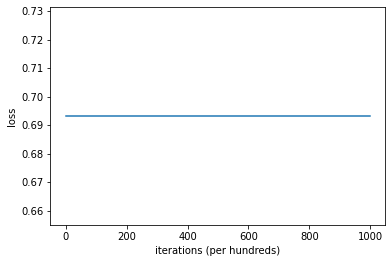

In [21]:
params = init_parameters(2)
new_params, loss_trace, Y_hat_predict = optimize(params, 0.1, 100000, 0)

print(Y_hat_predict)
print(new_params)

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()

코스트 함수가 변하지 않음

.

#### parameter를 random으로 초기화 하여 cost 함수 문제 해결

[[8.51714625e-04 9.99692637e-01 9.99692648e-01 3.28642426e-04]]


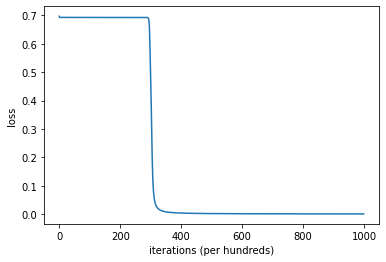

In [20]:
import matplotlib.pyplot as plt

def init_random_parameters (num_hidden = 2, deviation = 1):

    W1 = np.random.rand(2,num_hidden)*deviation
    B1 = np.random.random((num_hidden,1))*deviation
    W2 = np.random.rand(num_hidden,1)*deviation
    B2 = np.random.random((1,1))*deviation
    return W1, B1, W2, B2

init_random_parameters ()
params = init_random_parameters(2, 0.1)
new_params, loss_trace, Y_hat_predict = optimize(params, 0.1, 100000)
print(Y_hat_predict)
# Plot learning curve (with costs)
plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()

# sigmoid 말고 tanh 사용하기

Hidden layer에서 sigmiod 보다 tanh 함수가 더 좋은 성능을 낸다.

왜냐하면 tanh함수는 입력의 총합을 -1 에서 1사이의 값으로 변환해 주고 원점 중심이기 때문에 시그모이드와 달리 편향 이동이 일어나지 않는다.

[[0.00287029 0.99935889 0.99935882 0.00308093]]
0.0018329254606286164


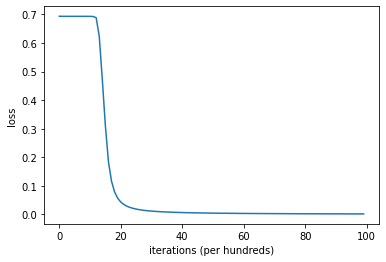

In [23]:
def tanh(x):
    ex = np.exp(x)
    enx = np.exp(-x)
    return (ex-enx)/(ex+enx)


def loss_eval_tanh (_params):
    
    W1, B1, W2, B2 = _params
    
    # Forward: input Layer
    Z1 = affine(W1, X, B1)
    H  = tanh(Z1)

    # Forward: Hidden Layer
    Z2 = affine(W2, H, B2)
    Y_hat = sigmoid(Z2)

    loss = 1./X.shape[1] * np.sum(-1 * (Y * np.log(Y_hat) + (1-Y) * np.log(1-Y_hat)))
    return Z1, H, Z2, Y_hat, loss


def get_gradients_tanh (_params):
       
    W1, B1, W2, B2 = _params
    
    Z1, H, Z2, Y_hat, loss = loss_eval_tanh([W1, B1, W2, B2])
    
    # BackPropagate: Hidden Layer
    dW2 = np.dot(H, (Y_hat-Y).T)
    dB2 = 1./4. * np.sum(Y_hat-Y, axis=1, keepdims=True)    
    dH  = np.dot(W2, Y_hat-Y)

    # BackPropagate: Input Layer
    dZ1 = dH * (1 - (H * H)) # <- Changed!
    dW1 = np.dot(X, dZ1.T)
    dB1 = 1./4. * np.sum(dZ1, axis=1, keepdims=True)
    
    return [dW1, dB1, dW2, dB2], loss


def optimize_tanh (_params, learning_rate = 0.1, iteration = 1000, sample_size = 0):
    
    params = np.copy(_params)

    loss_trace = []

    for epoch in range(iteration):
        
        dparams, loss = get_gradients_tanh(params)
        
        for param, dparam in zip(params, dparams):
            param += - learning_rate * dparam
        
        if (epoch % 100 == 0):
            loss_trace.append(loss)
        
    _, _, _, Y_hat_predict, _ = loss_eval_tanh(params) 
    
    return params,loss_trace, Y_hat_predict   


params = init_random_parameters(2, 0.1)
new_params, loss_trace, Y_hat_predict = optimize_tanh(params, 0.1, 10000)
print(Y_hat_predict)
print(loss_trace[-1])
# Plot learning curve (with costs)
plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()